# Part 1

In [3]:
import netCDF4 as nf
import os
import csv

## Extraction of dataset: 

In [4]:
data = nf.Dataset("air.mon.mean_1979-2015.nc")

In [6]:
variables = data.variables
variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: Time
     units: hours since 1800-01-01 00:00:0.0
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (444,)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: Longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: Latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (73,)
 filling off, 'level': <class 'netCDF4._netCDF4.Variable'>
 float32 level(level)
     standard_name: air_pressure
     long_name: Level
     units: millibar
     positive: down
     axis: Z
     GRIB_id: 100
     GRIB_name: hPa
     actual_range: [1000.   10.]
 unlimited dimensions: 
 current shape = (17,)
 filling off, '

In [7]:
#defining the variables using the ncdf4 library
time = variables["time"]
lon = variables["lon"]
lat = variables["lat"]
level = variables["level"]
air = variables["air"]

In [8]:
output_path = "data_output_new"

#### Slicing of the dataset:

Since the NetCDF files contain more than one pressure levels, I extracted just one pressure level which was relevant for our study. The pressure level at `index 0` is 1000 mb which is the surface pressure level. 
The variables in  a NetCDF files are read in the format `current shape = 444(time), 17(levels), 73(lat), 144(long).`

In [12]:
air_temp_at_surf=(air[:,2,:,:])

In [13]:
air_temp_at_surf[1][1] #Nested lists provide the values across one single latitude corresponding to all the longitudes. 

masked_array(data=[-27.30999 , -27.30999 , -27.299995, -27.29    ,
                   -27.29    , -27.299995, -27.32    , -27.339989,
                   -27.369987, -27.389992, -27.43    , -27.469994,
                   -27.510002, -27.55999 , -27.609993, -27.659996,
                   -27.719994, -27.769997, -27.839989, -27.900002,
                   -27.96    , -28.019997, -28.079994, -28.139992,
                   -28.19999 , -28.260002, -28.32    , -28.379997,
                   -28.43    , -28.489998, -28.54    , -28.579994,
                   -28.629997, -28.66999 , -28.71    , -28.739998,
                   -28.760002, -28.79    , -28.799995, -28.82    ,
                   -28.829994, -28.839989, -28.839989, -28.849998,
                   -28.839989, -28.839989, -28.82    , -28.80999 ,
                   -28.79    , -28.769997, -28.739998, -28.719994,
                   -28.69999 , -28.659996, -28.629997, -28.599998,
                   -28.55999 , -28.529991, -28.499992, -28.46 

### For loop for extracting the lat-long matrices corresponding to every timestep. 

The `for` loop helps in defining the directories and naming them according to the timestep using the `os` function. The `csv` function further helps in converting the matrices into the .csv format and is name according to the timestep. 

In [61]:
#using only one for loop as the pressure level was manually selected in the first step:
if not os.path.exists(output_path):
    os.mkdir(output_path)
for ii in range(0,len(air_temp_at_surf)):
    if not os.path.exists(os.path.join(output_path,"Timestep-"+str(ii))):
        os.mkdir(os.path.join(output_path,"Timestep-"+str(ii)))
    with open(os.path.join(output_path,"Timestep-"+str(ii),"Lat-Long-Matrix-"+str(ii)+".csv"),"w+") as csv_out:
        csvWriter = csv.writer(csv_out, delimiter=',')
        csvWriter.writerows(air_temp_at_surf[ii])

## Visualization: 

1. The first map is a heat map that shows temperature values for the entire globe corresponding to one timestep. 


2. The second plot is a timeseries for for the area average i.e one mean value obtained for every slice of the time which is an average value over the lat-long matrix. The avergae values for the matrix are then plotted for the entire timsteps to give a time long series. 

In [8]:
import matplotlib.pyplot as plt
import numpy as np

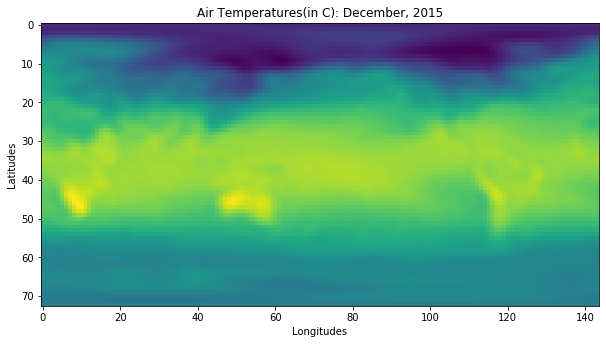

In [88]:
# 1. Heat Map: 
fig = plt.figure(figsize=(10.0,10.0))
image = plt.imshow(air_temp_at_surf[443])
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.title("Air Temperatures(in C): December, 2015" )
plt.show()

In [78]:
temp_mean=[]
for ii in range(0,len(air_temp_at_surf)):
    mean = np.mean(air_temp_at_surf[ii])
    temp_mean.append(mean)

#print(temp_mean)

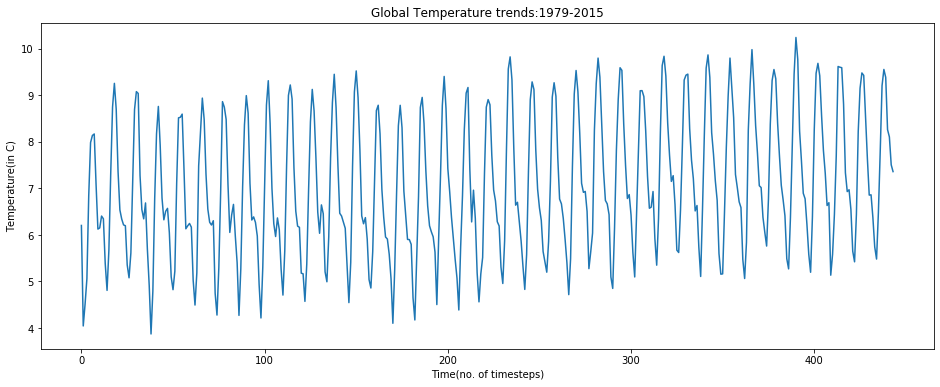

In [87]:
fig = plt.figure(figsize=(16.0,6.0))
ave_plot = plt.plot(temp_mean)
plt.xlabel('Time(no. of timesteps)')
plt.ylabel('Temperature(in C)')
plt.title('Global Temperature trends:1979-2015')
plt.show()

# Part 2:

In [101]:
datapath = "/home/eebc177student/Developer/Repos/eeb-c177-project/analyses/data_output_new/Timestep-0"
os.chdir(datapath)

#Reading it as a .csv file:
with open('Lat-Long-Matrix-0.csv',newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        print(', '.join(row))

In [9]:
# defining functions using the csv based netcdf files:

#Mean:

def matrix_mean(timestep_matrix):
    temp_mean=[]
    for ii in range(0,len(timestep_matrix)):
        mean = np.mean(timestep_matrix[ii])
        temp_mean.append(mean)
    return(temp_mean)
    
#Standard deviation:

def matrix_std(timestep_matrix):
    temp_std=[]
    for ii in range(0,len(timestep_matrix)):
        std = np.std(timestep_matrix[ii])
        temp_std.append(std)
    return(temp_std)
    
#Maximum values:

def matrix_max(timestep_matrix):
    temp_max=[]
    for ii in range(0,len(timestep_matrix)):
        maxm = np.max(timestep_matrix[ii])
        temp_max.append(maxm)
    return(temp_max)
    
#Minimum values: 

def matrix_min(timestep_matrix):
    temp_min=[]
    for ii in range(0,len(timestep_matrix)):
        minm = np.min(timestep_matrix[ii])
        temp_min.append(minm)
    return(temp_min)

In [16]:
import matplotlib.pyplot
def visualize(timestep_matrix):
    
    #1) Finding mean, max, min and standard deviation
    max_global = matrix_max(timestep_matrix)
    min_global = matrix_min(timestep_matrix)
    mean_global = matrix_mean(timestep_matrix)
    std_global = matrix_std(timestep_matrix)
    
    #2) create our three subplot holders
    fig = matplotlib.pyplot.figure(figsize=(20.0,10.0))
    axes1= fig.add_subplot(2,2,1)
    axes2= fig.add_subplot(2,2,2)
    axes3= fig.add_subplot(2,2,3)
    axes4= fig.add_subplot(2,2,4)
    
    #3) plot each of them 
    fig.suptitle('Global Temperature Trends and Statistics: 1979-2015', fontsize=25)
    axes1.set_ylabel('Average')
    axes1.plot(mean_global)
    
    axes2.set_ylabel('Maximum')
    axes2.plot(max_global)
    
    axes3.set_ylabel('Minimum')
    axes3.plot(min_global)
    axes3.set_xlabel('No. of Timesteps')
    
    axes4.set_ylabel('Standard Deviation')
    axes4.plot(std_global)
    axes4.set_xlabel('No. of Timesteps')
    
    #4) we want to show the plot
    fig.tight_layout
    matplotlib.pyplot.show()
    
    

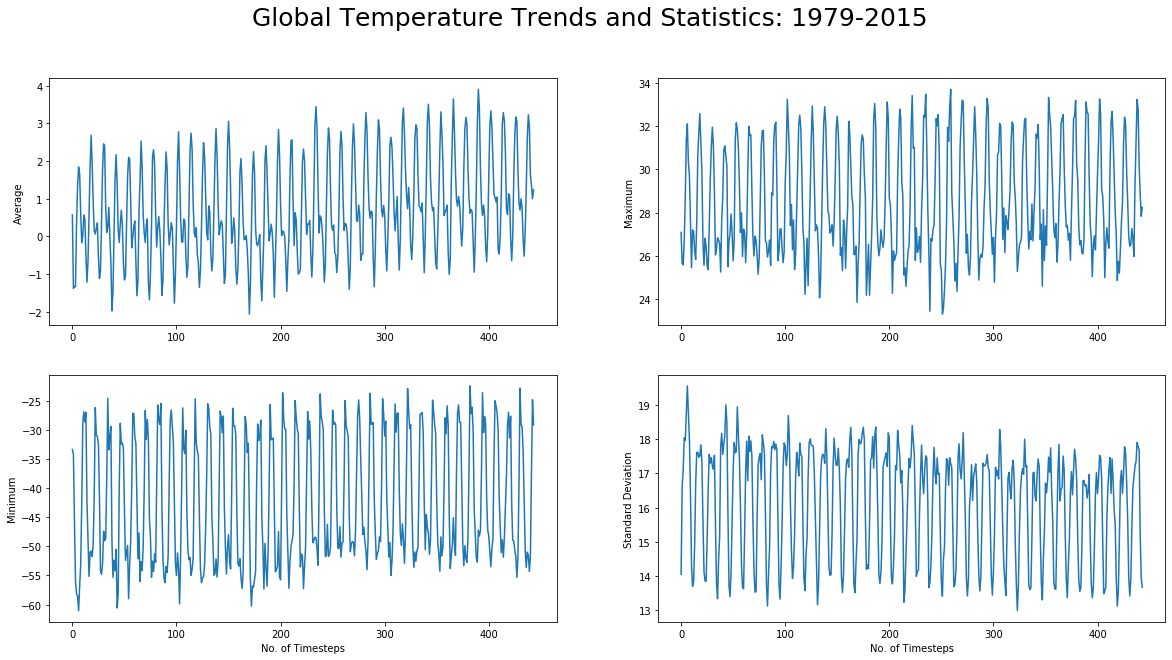

NameError: name 'savefig' is not defined

In [20]:
visualize(air_temp_at_surf)
plt.savefig('sample.png')

# Part 3: 

The `format()` function was used within a function `Area_average` which calculates the average over the matrices at every time step and then appends and concatenates it with a string. 

In [230]:
def Area_Average(timestep_matrix):
    temp_mean=[]
    for ii in range(0,len(timestep_matrix)):
        mean = np.mean(timestep_matrix[ii])
        temp_mean.append(f"Global Average is {mean} when timestep is {ii}") 
        #appending the list with strings and statements by using "f-strings"
    return(temp_mean)

In [231]:
Area_Average(air_temp_at_surf)
#This function takes in matrices for a time period and give a string appended list as output. 

['Global Average is 6.204460144042969 when timestep is 0',
 'Global Average is 4.044360637664795 when timestep is 1',
 'Global Average is 4.51111364364624 when timestep is 2',
 'Global Average is 5.060529708862305 when timestep is 3',
 'Global Average is 6.846137046813965 when timestep is 4',
 'Global Average is 7.986599922180176 when timestep is 5',
 'Global Average is 8.138885498046875 when timestep is 6',
 'Global Average is 8.17082405090332 when timestep is 7',
 'Global Average is 7.086686134338379 when timestep is 8',
 'Global Average is 6.126269340515137 when timestep is 9',
 'Global Average is 6.151583671569824 when timestep is 10',
 'Global Average is 6.406535625457764 when timestep is 11',
 'Global Average is 6.3479485511779785 when timestep is 12',
 'Global Average is 5.386807918548584 when timestep is 13',
 'Global Average is 4.809067726135254 when timestep is 14',
 'Global Average is 5.6765875816345215 when timestep is 15',
 'Global Average is 7.324960231781006 when timeste